In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf
stock_symbol = "RELIANCE.NS" #NSE stocks usually end with .NS
# Download stock data
stk_data = yf.download(stock_symbol, start="2023-01-01", end="2023-07-01")

C:\Users\Admin\anaconda3\envs\aitd\Lib\site-packages\yfinance\scrapers\history.py:201: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  1 of 1 completed


In [3]:
stk_data 

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2023-01-02,1175.889648,1177.304802,1163.244669,1164.066352,5316175
2023-01-03,1167.284668,1174.565828,1163.062148,1170.936659,7658932
2023-01-04,1149.709595,1169.110728,1147.632506,1167.261851,9264891
2023-01-05,1147.655151,1157.857903,1143.067373,1151.969076,13637099
2023-01-06,1158.086304,1163.130627,1149.595501,1153.407240,6349597
...,...,...,...,...,...
2023-06-23,1147.974976,1156.488600,1146.719570,1154.434333,6628570
2023-06-26,1139.210205,1148.271658,1136.083222,1144.437098,12641159


In [4]:
stk_data=stk_data[["Open","High","Low","Close"]]
#stk_data.to_csv("Tatacoffee13_21.csv")

In [5]:
column="Close"

In [6]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (122, 1)


In [7]:
training_size = round(len(data1 ) * 0.95)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

116
X_train length: (116, 1)
X_test length: (6, 1)
y_train length: (116, 1)
y_test length: (6, 1)


In [8]:
!pip install --upgrade statsmodels 

In [9]:

import statsmodels

from statsmodels.tsa.arima.model import ARIMA
import numpy as np
#assuming X_train is your training data(replace with actual data)
X_train = np.array([10,12, 14, 16, 18])
    
model = ARIMA(X_train, order=(0, 0, 1))
model_fit = model.fit()
n = 5 #number of predictions    
y_pred = model_fit.predict(start=len(X_train), end=len(X_train) + n - 1)
print(y_pred)
    

[16.00000215 14.00000445 14.00000445 14.00000445 14.00000445]


In [10]:
import pandas as pd
data = {
    "Close": [100, 102, 104, 103, 105, 106, 108]
}
df = pd.DataFrame(data)
df["CloseMA"] = df["Close"].rolling(window=3).mean()
print(df)

   Close     CloseMA
0    100         NaN
1    102         NaN
2    104  102.000000
3    103  103.000000
4    105  104.000000
5    106  104.666667
6    108  106.333333


In [11]:
len(y_pred)

5

In [12]:
#i=1
td="c"
model = ARIMA(X_train, order=(0,0,30),trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
print(y_pred)


[18.0328324  15.59326019 13.01033779 11.64781061 10.90699732 11.09404092
 12.99742591 15.3104143  16.17295238 15.89640479 15.42626829 14.43004639
 13.00416128 12.45542453 13.04777234 13.67475554 13.9952261  14.45963056
 14.76650504 14.40744119 13.89467707 13.83050229 13.89762823 13.80528241
 13.85378421 14.08025962 14.14097409 14.02646545 13.96869333 13.98733345
 13.99995593 13.99995593 13.99995593 13.99995593 13.99995593 13.99995593
 13.99995593 13.99995593 13.99995593 13.99995593 13.99995593 13.99995593
 13.99995593 13.99995593 13.99995593 13.99995593 13.99995593 13.99995593
 13.99995593 13.99995593 13.99995593 13.99995593 13.99995593 13.99995593
 13.99995593 13.99995593 13.99995593 13.99995593 13.99995593 13.99995593
 13.99995593 13.99995593 13.99995593 13.99995593 13.99995593 13.99995593
 13.99995593 13.99995593 13.99995593 13.99995593 13.99995593 13.99995593
 13.99995593 13.99995593 13.99995593 13.99995593 13.99995593 13.99995593
 13.99995593 13.99995593 13.99995593 13.99995593 13

C:\Users\Admin\anaconda3\envs\aitd\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


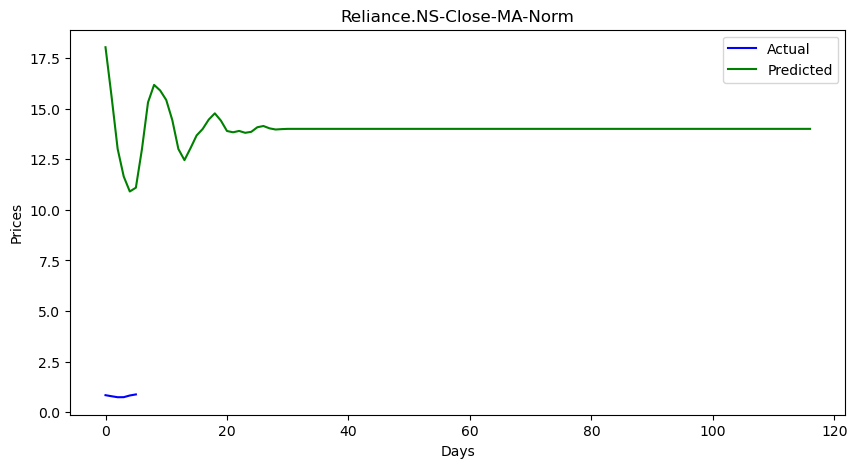

In [13]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","Reliance.NS-Close-MA-Norm","Days","Prices")

In [14]:
len(data1)

122

In [15]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [16]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

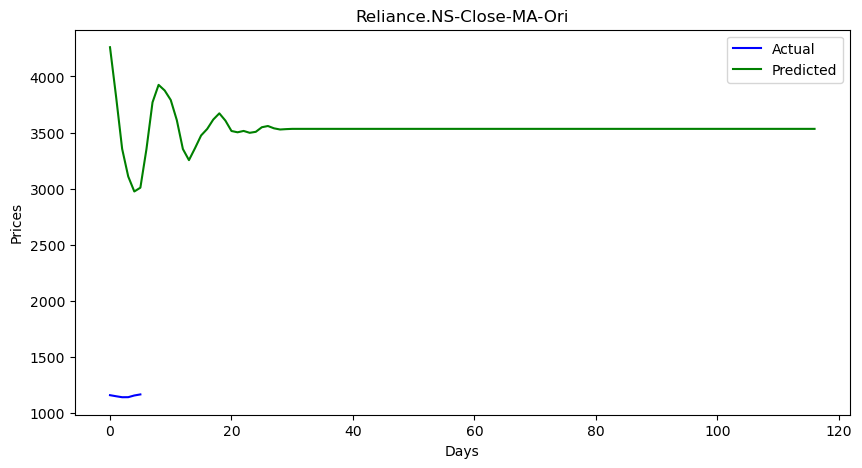

In [17]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Reliance.NS-Close-MA-Ori","Days","Prices")

In [18]:
forecast=model_fit.predict(len(data1), len(data1))

In [19]:
forecast

array([13.99995593])

In [20]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [21]:
forecast_stock_price_test_oriF

,Closefore
0,3532.795143


In [22]:
forecast_stock_price_test_oriF.to_csv("CloseMA.csv",index=False)

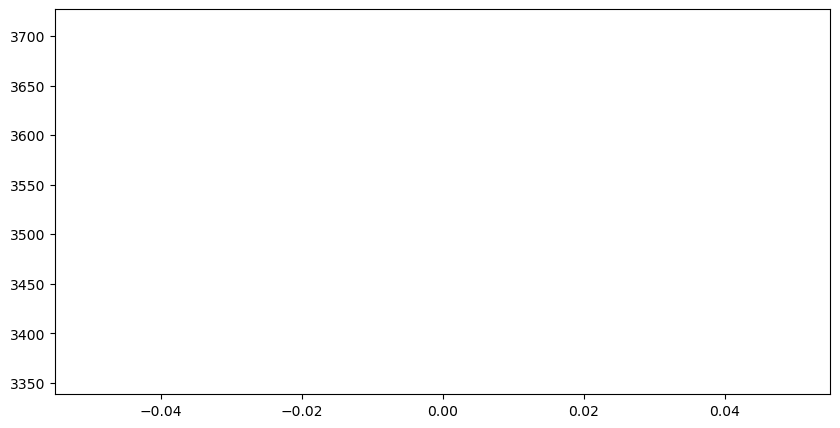

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")